In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:/Users/Admin/Downloads/Copper.csv')

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df=df.drop(columns=df[['id','material_ref']])

In [6]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [7]:
# checking null values

df.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [10]:
df.shape

(181638, 12)

In [11]:
df.duplicated().sum()

0

In [12]:
# Exploring data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181638 non-null  float64
 1   quantity tons  181638 non-null  object 
 2   customer       181638 non-null  float64
 3   country        181638 non-null  float64
 4   status         181638 non-null  object 
 5   item type      181638 non-null  object 
 6   application    181638 non-null  float64
 7   thickness      181638 non-null  float64
 8   width          181638 non-null  float64
 9   product_ref    181638 non-null  int64  
 10  delivery date  181638 non-null  float64
 11  selling_price  181638 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 18.0+ MB


In [13]:
# quantity tons data type is float. 
# change the data type obj to float

df['quantity tons']=df['quantity tons'].replace('e',np.nan)
df['quantity tons']=df['quantity tons'].astype('float')
print('Median :',df['quantity tons'].median())


Median : 30.36257954


In [14]:
df['quantity tons']=df['quantity tons'].fillna(30.36395321)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181638 non-null  float64
 1   quantity tons  181638 non-null  float64
 2   customer       181638 non-null  float64
 3   country        181638 non-null  float64
 4   status         181638 non-null  object 
 5   item type      181638 non-null  object 
 6   application    181638 non-null  float64
 7   thickness      181638 non-null  float64
 8   width          181638 non-null  float64
 9   product_ref    181638 non-null  int64  
 10  delivery date  181638 non-null  float64
 11  selling_price  181638 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 18.0+ MB


In [16]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816380e+05,1.816380e+05,1.816380e+05,181638.000000,181638.000000,181638.000000,181638.000000,1.816380e+05,1.816380e+05,1.816380e+05
mean,2.020459e+07,5.876006e+03,3.023251e+07,44.893079,25.616286,2.564151,1295.262682,4.740325e+08,2.020738e+07,1.918328e+03
std,4.551294e+03,2.349301e+06,1.005615e+05,24.404245,17.754183,6.572518,261.642520,7.175384e+08,2.411281e+04,3.318267e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.096868e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036327e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716141e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


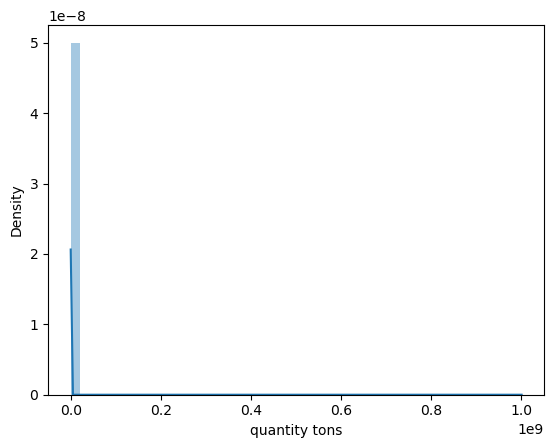

In [17]:
sns.distplot(df['quantity tons'])
plt.show()

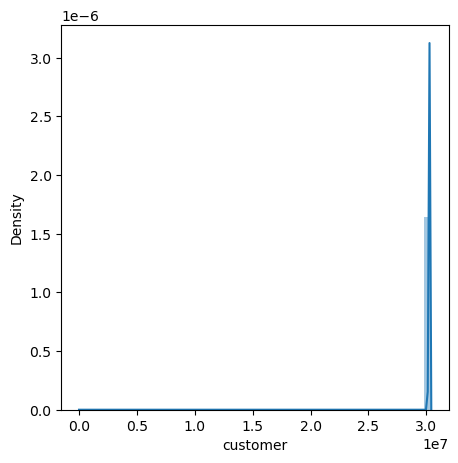

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(df['customer'])
plt.show()

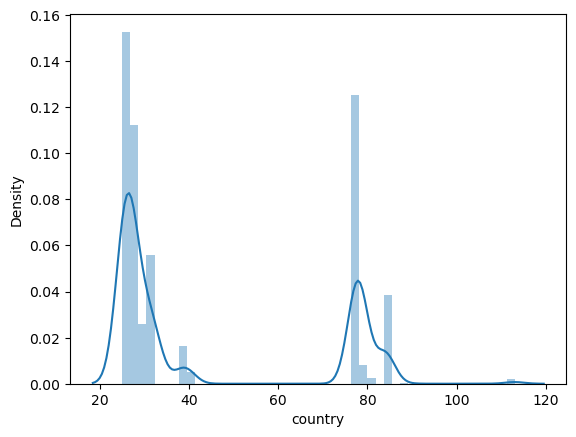

In [19]:
sns.distplot(df['country'])
plt.show()

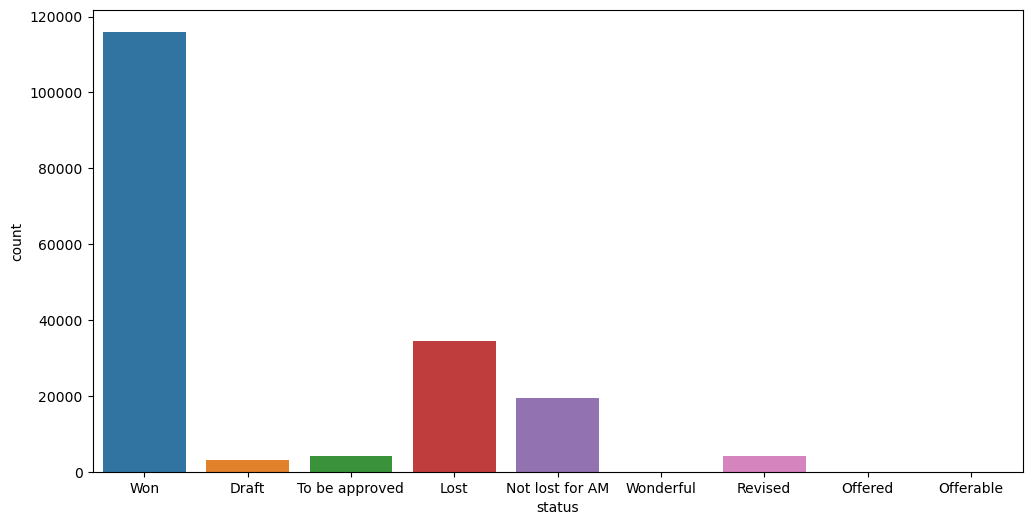

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(df['status'])
plt.show()

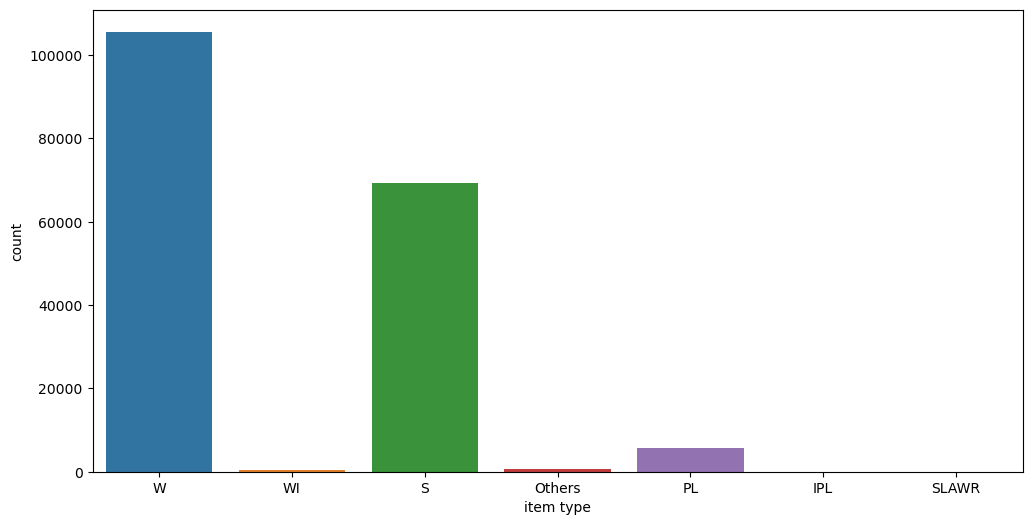

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['item type'])
plt.show()


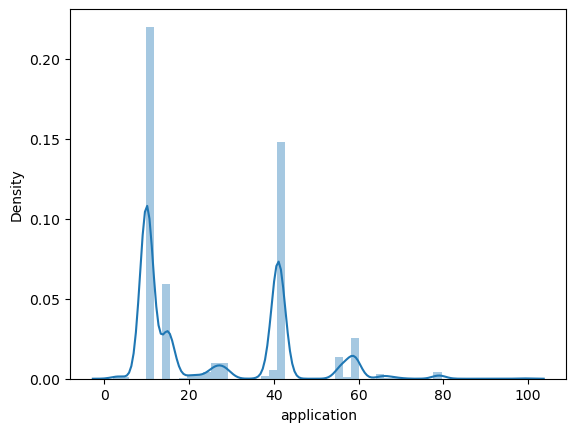

In [22]:
sns.distplot(df['application'])
plt.show()

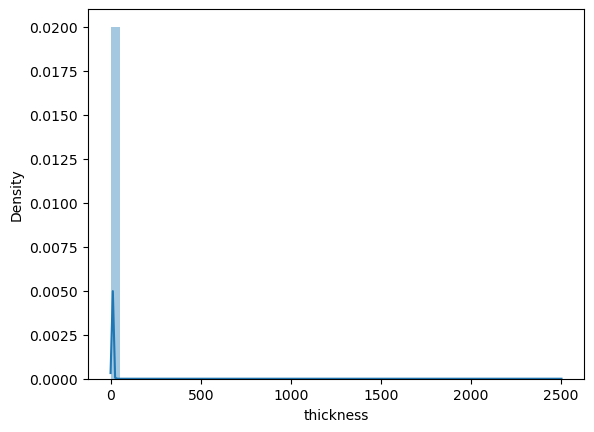

In [23]:
sns.distplot(df['thickness'])
plt.show()

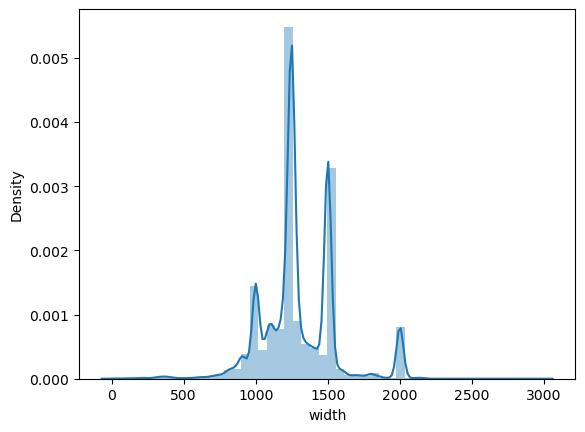

In [24]:
sns.distplot(df['width'])
plt.show()

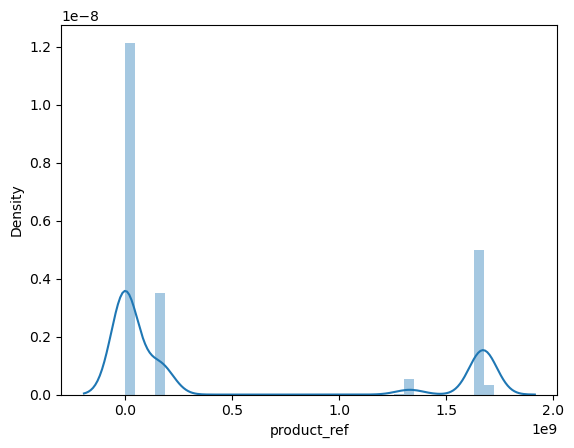

In [25]:
sns.distplot(df['product_ref'])
plt.show()

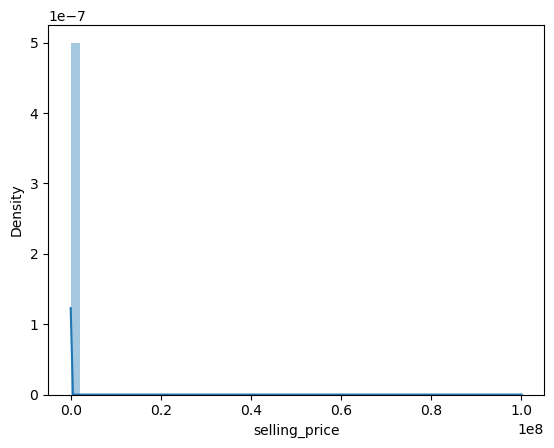

In [26]:
sns.distplot(df['selling_price'])
plt.show()

In [27]:
df['item_date']=df['item_date'].astype('str')
df['delivery date']=df['delivery date'].astype('str')

In [28]:
df['item_date_year']=df['item_date'].apply(lambda x:int(x[:4]))
df['item_date_month']=df['item_date'].apply(lambda x: int(x[4:6]))
df['delivery_date_year']=df['delivery date'].apply(lambda x:int(x[:4]))
df['delivery_date_month']=df['delivery date'].apply(lambda x:int(x[4:6]))

In [29]:
sample = [23 , -56]
print ("\nAbsolute Value of arr2 : \n",
                        np.abs(sample))


Absolute Value of arr2 : 
 [23 56]


In [30]:
df['overall_month']=np.abs(df['item_date_month']-df['delivery_date_month'])
df['overall_year']=np.abs(df['item_date_year']-df['delivery_date_year'])

In [31]:
df.drop(columns=['item_date','delivery date','item_date_month','delivery_date_month','delivery_date_year','item_date_year'],inplace=True)


In [32]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,3,0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0,0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,3,0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,3,0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,1,0


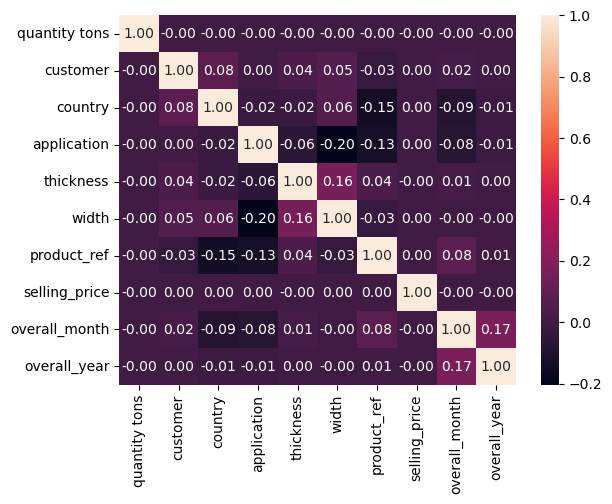

In [33]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

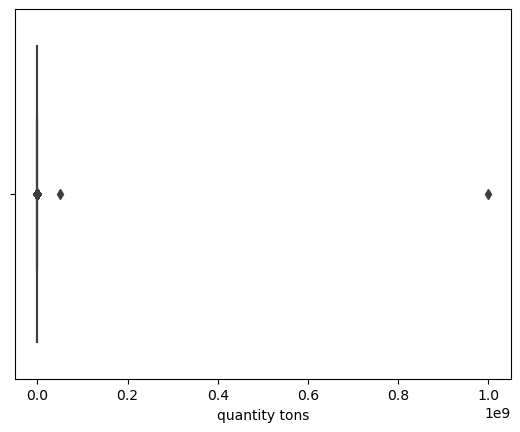

In [34]:
# treat outliers
sns.boxplot(df['quantity tons'])
plt.show()

In [35]:
qrt1 = np.quantile(df['quantity tons'],q = 0.25)
median = df['quantity tons'].median()
qrt3 = np.quantile(df['quantity tons'],q = 0.75)
iqr = qrt3 - qrt1
lowb = qrt1 - 1.5*iqr
uppb = qrt3 + 1.5*iqr
print('quantile1:',qrt1)
print('median:',median)
print('quantile3:',qrt3)
print('lowerband:',lowb)
print('upperband:',uppb)

quantile1: 10.968678409999999
median: 30.363266375
quantile3: 67.161414615
lowerband: -73.3204258975
upperband: 151.4505189225


In [36]:
outliers = []
for i in df['quantity tons']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
print(outliers)

[54.15113862, 151.4505189225, 151.4505189225, 151.4505189225, 151.4505189225, 151.4505189225, 3.522612599, 113.3871236, 69.0718528, 151.4505189225, 9.175769997, 113.9956655, 27.51254472, 32.23531688, 10.41134954, 35.31033249, 75.12439366, 20.80711354, 16.25398663, 53.58103351, 71.36697792, 151.4505189225, 14.20357413, 53.72974562, 79.33399031, 151.4505189225, 15.92798991, 151.4505189225, 99.05919889, 151.4505189225, 9.822403729, 102.4217728, 75.75766317, 151.4505189225, 13.80164316, 151.4505189225, 29.01093671, 92.7172555, 19.34617892, 44.77285681, 52.65787989, 59.90735531, 10.97138518, 151.4505189225, 56.8313529, 49.7045555, 16.70302671, 151.4505189225, 26.53371627, 132.8841142, 9.884344681, 126.7762014, 27.74322116, 30.89994963, 17.84291462, 151.4505189225, 62.57489188, 37.87714559, 13.6347697, 151.4505189225, 43.48741555, 151.4505189225, 18.9850882, 151.4505189225, 10.97329262, 151.4505189225, 13.38817738, 122.9416814, 14.54900037, 97.39255354, 18.43100013, 129.2266376, 18.68071007,

In [37]:
df['quantity tons'] = outliers

<function matplotlib.pyplot.show(close=None, block=None)>

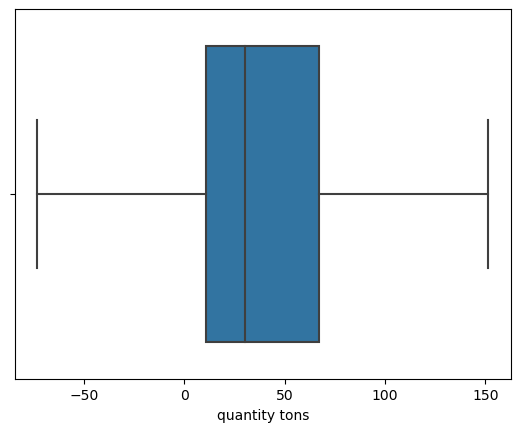

In [38]:
sns.boxplot(df['quantity tons'])
plt.show

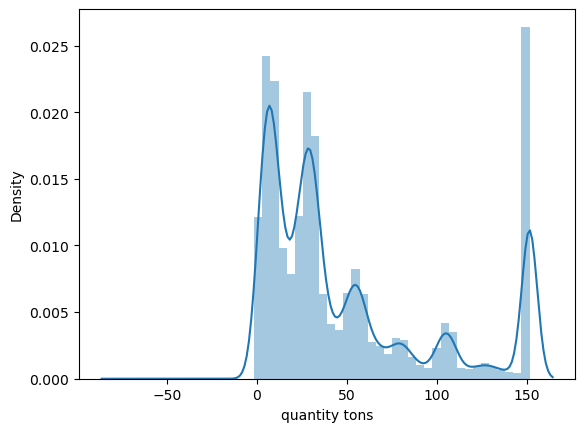

skewness: 1.1216567758562528


In [39]:
sns.distplot(df['quantity tons'])
plt.show()
print('skewness:',df['quantity tons'].skew())

<AxesSubplot:xlabel='customer'>

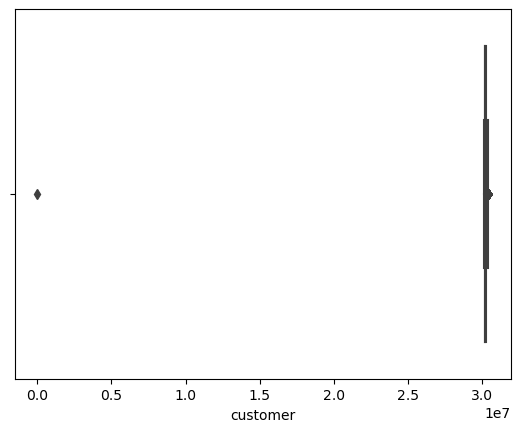

In [40]:
# customer
sns.boxplot(df['customer'])

In [41]:
 # good skewness value between ‐2 to +2

In [42]:
qrt1 = np.quantile(df['customer'],q = 0.25)
median = df['customer'].median()
qrt3 = np.quantile(df['customer'],q=0.75)
iqr =qrt3 - qrt1
lowb = qrt1 - 1.5*iqr
uppb = qrt3 +1.5*iqr
print('quantile 1:',qrt1)
print('median:',median)
print('quantile 3:',qrt3)
print('lowerband:',lowb)
print('upperband:',uppb)

quantile 1: 30196884.0
median: 30205242.0
quantile 3: 30280416.0
lowerband: 30071586.0
upperband: 30405714.0


In [43]:
outliers = []
for i in df['customer']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['customer'] = outliers
        

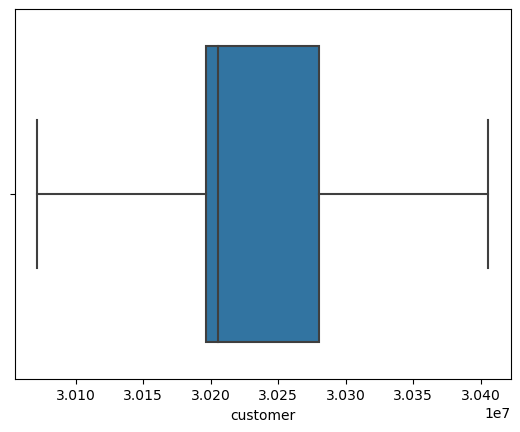

In [44]:
sns.boxplot(df['customer'])
plt.show()

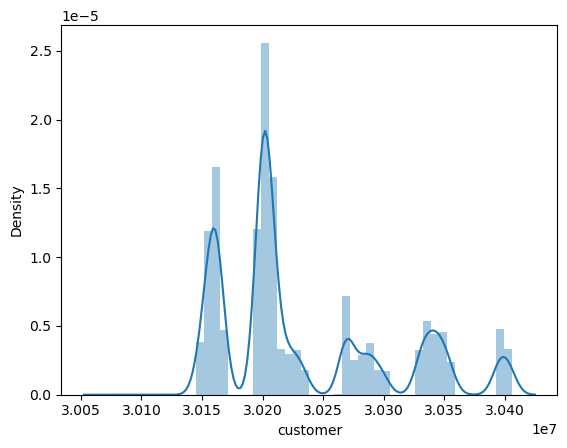

skewness value: 0.9047427587165121


In [45]:
sns.distplot(df['customer'])
plt.show()
print('skewness value:',df['customer'].skew())

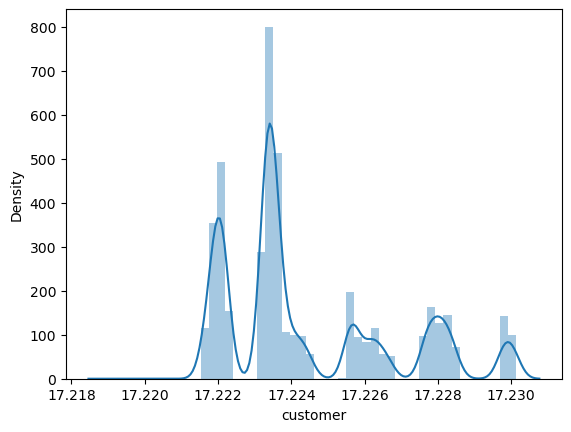

Skewness : 0.9016673535353062


In [46]:
df['customer']=np.log(df['customer'])
sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

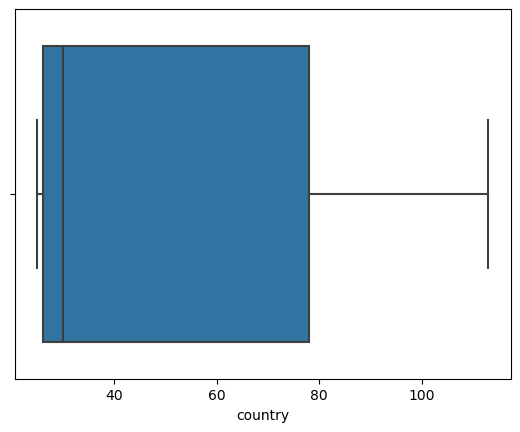

In [47]:
sns.boxplot(df['country'])
plt.show()

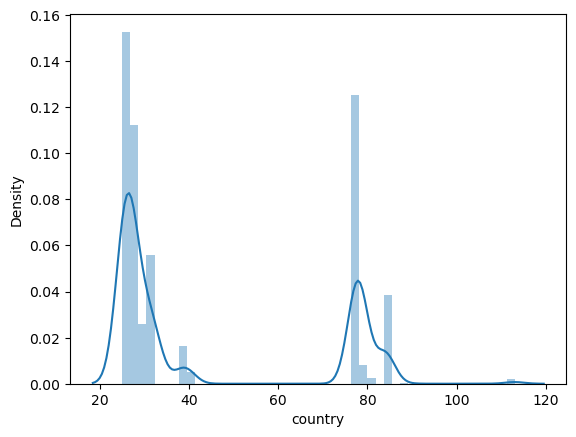

Skewness : 0.7535909197330176


In [48]:
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

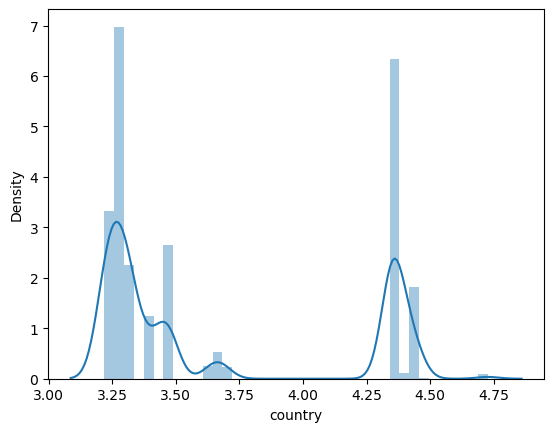

Skewness : 0.6590225770371265


In [49]:
df['country']=np.log(df['country'])
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

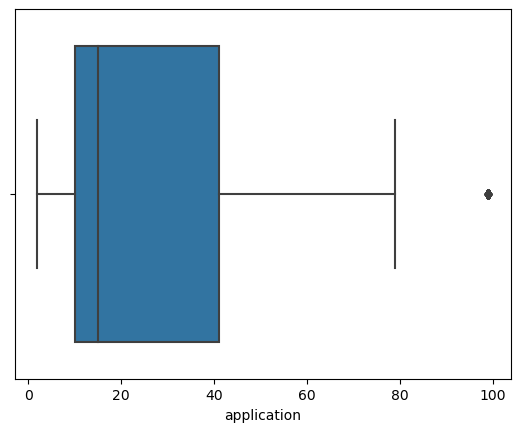

In [50]:
sns.boxplot(df['application'])
plt.show()

In [51]:
qrt1=np.quantile(df['application'],q=0.25)
median=df['application'].median()
qrt3=np.quantile(df['application'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['application']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['application']=outliers

Quartile 1 : 10.0
Median     : 15.0
Quartile 3 : 41.0
Lowerbound : -36.5
Upperbound : 87.5


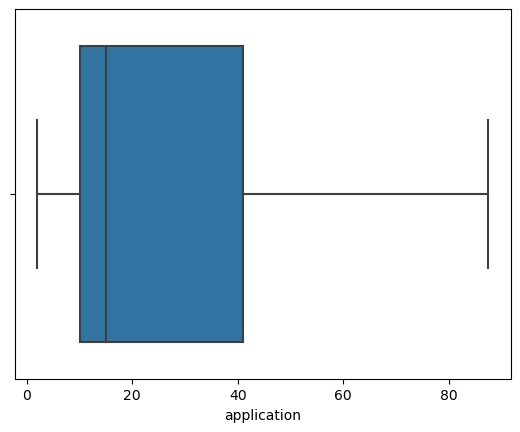

In [52]:
sns.boxplot(df['application'])
plt.show()

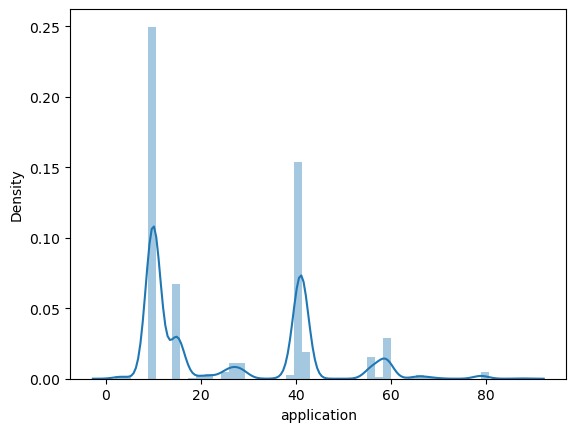

Skewness : 0.7073511951360936


In [53]:
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

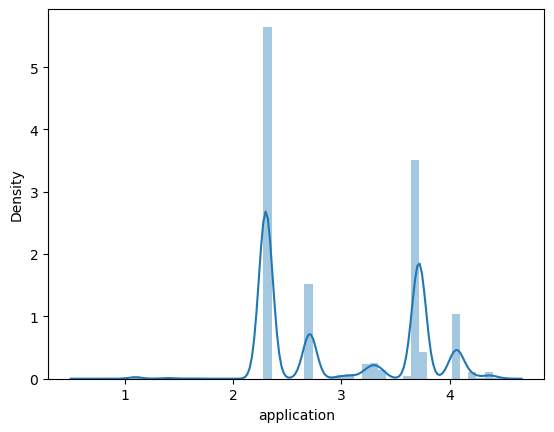

Skewness : 0.1938105793424309


In [54]:
df['application']=np.log(df['application'])
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

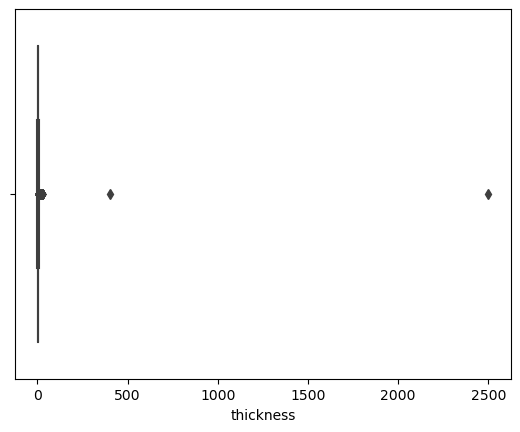

In [55]:
sns.boxplot(df['thickness'])
plt.show()

In [56]:
qrt1=np.quantile(df['thickness'],q=0.25)
median=df['thickness'].median()
qrt3=np.quantile(df['thickness'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['thickness']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['thickness']=outliers

Quartile 1 : 0.7
Median     : 1.5
Quartile 3 : 3.0
Lowerbound : -2.75
Upperbound : 6.449999999999999


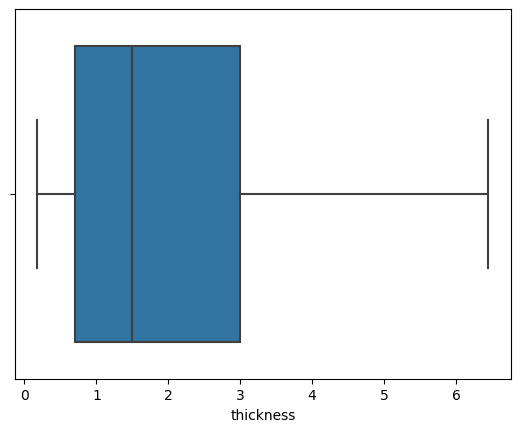

In [57]:
sns.boxplot(df['thickness'])
plt.show()

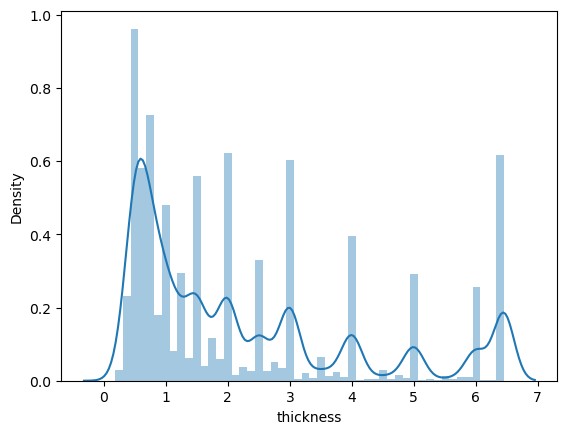

Skewness : 1.0613762337146269


In [58]:
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

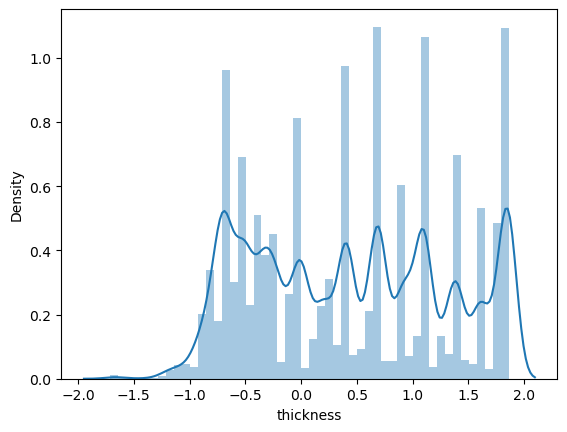

Skewness : 0.1011168748412259


In [59]:
df['thickness']=np.log(df['thickness'])
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

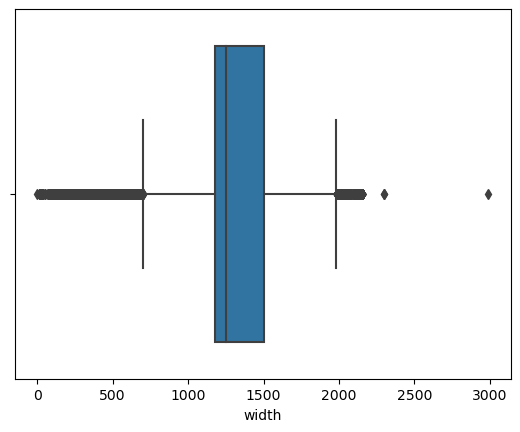

In [60]:
# width
sns.boxplot(df['width'])
plt.show()

In [61]:
qrt1=np.quantile(df['width'],q=0.25)
median=df['width'].median()
qrt3=np.quantile(df['width'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['width']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['width']=outliers

Quartile 1 : 1180.0
Median     : 1250.0
Quartile 3 : 1500.0
Lowerbound : 700.0
Upperbound : 1980.0


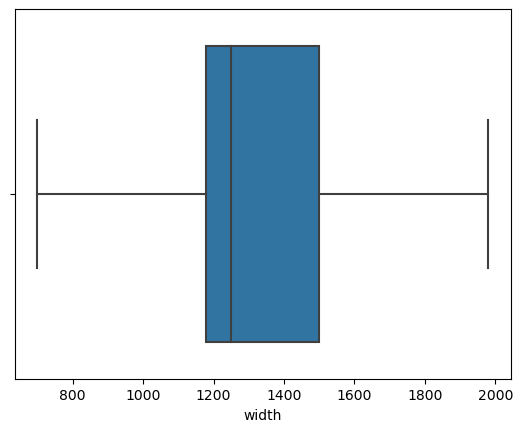

In [62]:
sns.boxplot(df['width'])
plt.show()

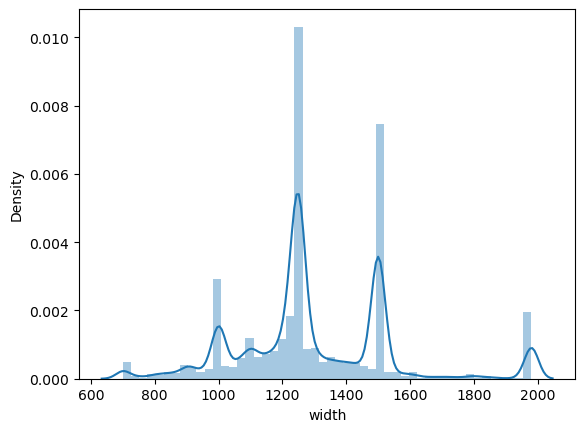

Skewness : 0.6679623562773281


In [63]:
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

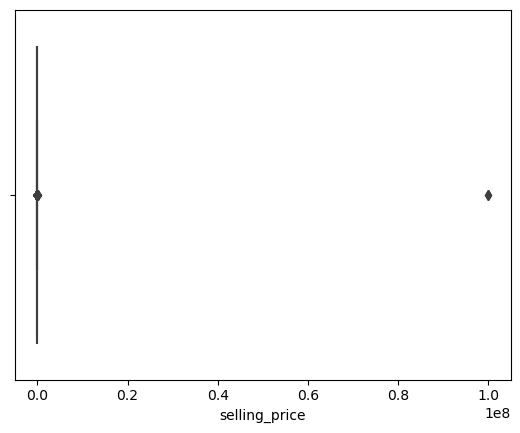

In [64]:
# selling price
sns.boxplot(df['selling_price'])
plt.show()

In [65]:
qrt1=np.quantile(df['selling_price'],q=0.25)
median=df['selling_price'].median()
qrt3=np.quantile(df['selling_price'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['selling_price']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['selling_price']=outliers

Quartile 1 : 669.0
Median     : 812.0
Quartile 3 : 953.0
Lowerbound : 243.0
Upperbound : 1379.0


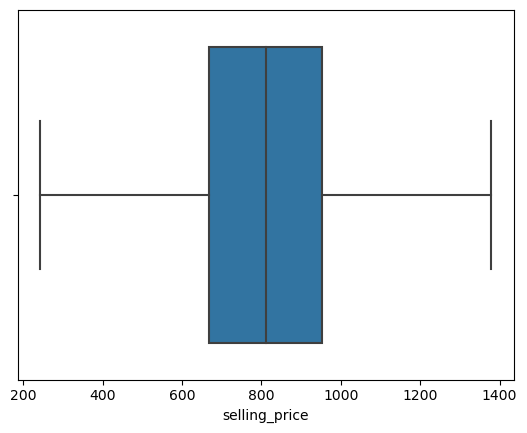

In [66]:
sns.boxplot(df['selling_price'])
plt.show()

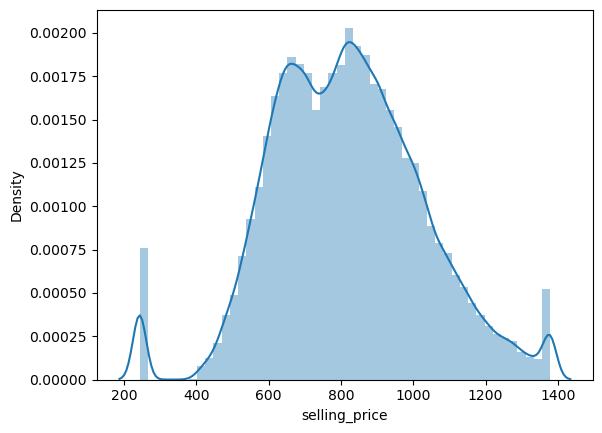

Skewness : 0.1379918523197989


In [67]:
sns.distplot(df['selling_price'])
plt.show()
print('Skewness :',df['selling_price'].skew())

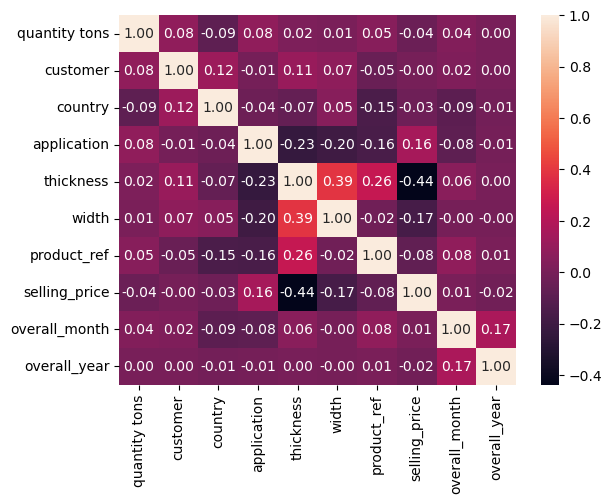

In [68]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

 # Encoding data 

In [69]:
df=df[(df['status']=='Won') | (df['status']=='Lost')]

In [70]:
# Status
df['status']=df['status'].map({'Won':1,'Lost':0})
# Item Type
df['item type']=df['item type'].map({'W':0,'WI':1,'S':2,'Others':3,'PL':4,'IPL':5,'SLAWR':6})

In [71]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,17.221905,3.332205,1,0,2.302585,0.693147,1500.0,1670798778,854.00,3,0
1,151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,1210.0,1668701718,1047.00,0,0
2,151.450519,17.221827,3.401197,1,1,3.332205,-0.967584,952.0,628377,644.33,3,0
3,151.450519,17.228293,3.465736,1,2,4.077537,0.832909,1317.0,1668701718,768.00,3,0
4,151.450519,17.223735,3.332205,1,0,2.302585,1.386294,1980.0,640665,577.00,1,0


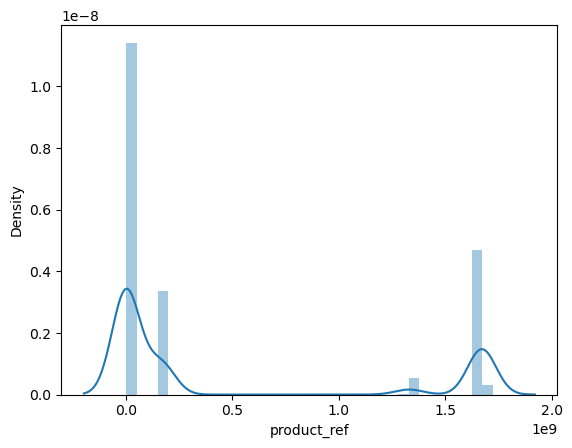

Skewness : 1.0134161158465167


In [72]:
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

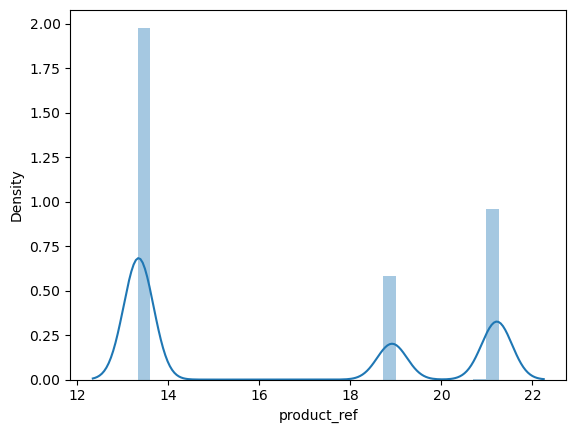

Skewness : 0.3683597251580846


In [73]:
df['product_ref']=np.log(df['product_ref'])
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

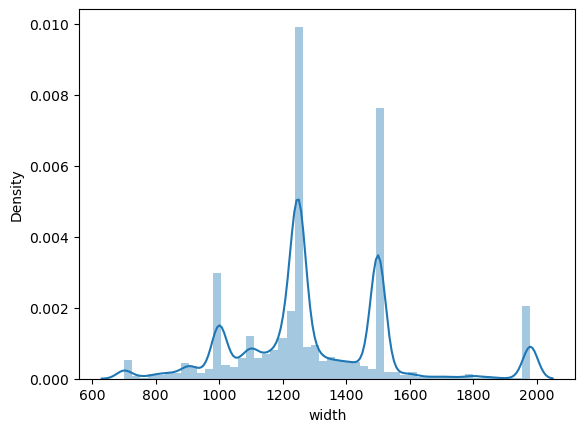

Skewness : 0.6500441075595754


In [74]:

sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

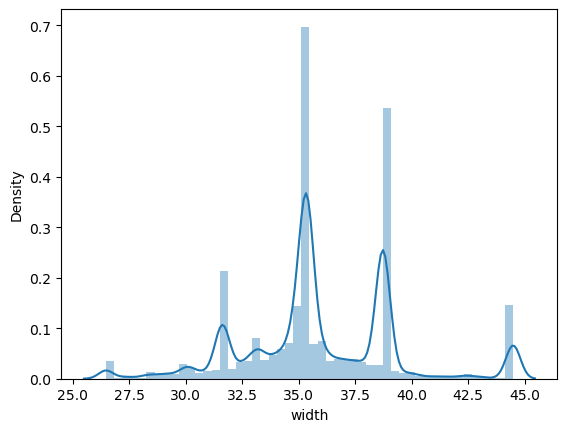

Skewness : 0.26181570124880105


In [75]:
df['width']=np.sqrt(df['width'])
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

In [76]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,17.221905,3.332205,1,0,2.302585,0.693147,38.729833,21.236568,854.00,3,0
1,151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,34.785054,21.235312,1047.00,0,0
2,151.450519,17.221827,3.401197,1,1,3.332205,-0.967584,30.854497,13.350896,644.33,3,0
3,151.450519,17.228293,3.465736,1,2,4.077537,0.832909,36.290495,21.235312,768.00,3,0
4,151.450519,17.223735,3.332205,1,0,2.302585,1.386294,44.497191,13.370262,577.00,1,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
x=df[['quantity tons','customer','country','status','item type','application','thickness','width','product_ref','overall_month','overall_year']]
y=df['selling_price']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [80]:
# scaling
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# Regression problem

In [81]:

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesRegressor,ExtraTreesClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_score,recall_score,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [82]:
# Linear Regression 

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.4008148144818945
MSE : 22717.830871970644
MAE : 121.72499315359505


In [83]:
# DT 

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7835364702381817
MSE : 8207.115225698743
MAE : 51.22457384271501


In [84]:
# KNN 

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7374653796182866
MSE : 9953.879448323849
MAE : 67.66854648586367


In [85]:
# Random Forest 

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8705994365933142
MSE : 4906.1628779571565
MAE : 43.74403173740718


In [86]:
gb=GradientBoostingRegressor(n_estimators=150)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7181909074258749
MSE : 10684.6622012971
MAE : 79.06306699453874


In [87]:
# XGBoost 

xbg=XGBRegressor()
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8278229086111012
MSE : 6528.015272638349
MAE : 58.62781599355


In [88]:
# Extra Tree

extra_tree_model = ExtraTreesRegressor(n_estimators = 100,
          criterion ='squared_error', max_features = "auto")
extra_tree_model.fit(x_train,y_train)
y_pred=extra_tree_model.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8562353080121795
MSE : 5450.772210124294
MAE : 44.3715977542508


In [89]:
rf.predict([[54.151139,np.log(30156308.0),np.log(28),1,0,np.log(10),np.log(2),np.log(1500),np.log(1670798778),3,0]])


array([1044.68])

In [90]:
rf.predict([[151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,34.785054,21.235312,0,0]])[0]
# 'quantity tons','customer','country','status','item type','application','thickness','width','product_ref','overall_month','overall_year'


910.9975000000002

In [91]:
rf.predict([[151.450519,17.221827,3.401197,1,1,3.332205,-0.967584,30.854497,13.350896,3,0]])[0]

954.69

# pickle

In [92]:
import pickle

In [93]:
# model=pickle.dump(rf,open('model.sav','wb'))
#  scale=pickle.dump(scaler,open('scale.sav','wb'))

# classification


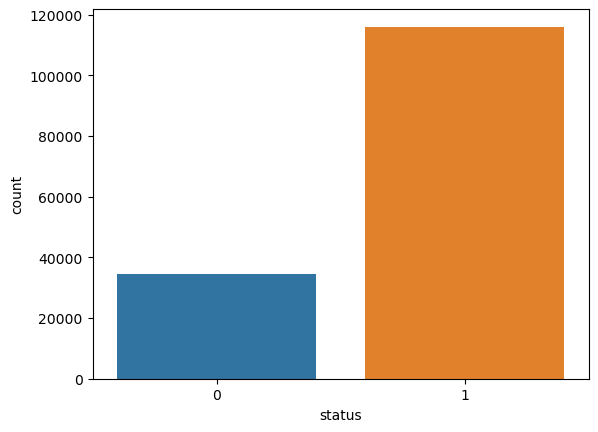

In [94]:

sns.countplot(df['status'])
plt.show()

In [95]:
x=df.drop(columns=['status'])
y=df['status']

In [96]:
y.value_counts()

1    116008
0     34432
Name: status, dtype: int64

# oversampling

In [97]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

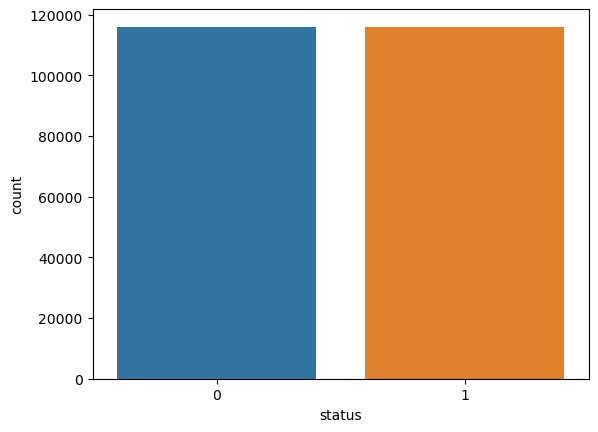

In [100]:
sns.countplot(y_sm)
plt.show()

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [102]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [103]:
# Logistic Regression 

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.6710315770930284
Precision : 0.6845273751048281
Recall : 0.6580576430278425


In [104]:
# Decision Tree 

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9509355867896869
Precision : 0.9492984419385383
Recall : 0.9525783881834672


In [105]:
# KNN 
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9124117647058824
Precision : 0.9324596471189396
Recall : 0.893207797068901


In [106]:
# Random Forest

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9714674109531591
Precision : 0.9758847114881748
Recall : 0.9670899196683078


In [107]:
# Gradient Boost

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.8365918764879878
Precision : 0.8384913518829178
Recall : 0.8347009875903372


In [114]:
# model=pickle.dump(rf,open('modelclass.sav','wb'))
# scale=pickle.dump(scaler,open('scaleclass.sav','wb'))

In [115]:
print(x_sm)


        quantity tons   customer   country  item type  application  thickness  \
0           54.151139  17.221905  3.332205          0     2.302585   0.693147   
1          151.450519  17.223450  3.218876          0     3.713572  -0.223144   
2          151.450519  17.221827  3.401197          1     3.332205  -0.967584   
3          151.450519  17.228293  3.465736          2     4.077537   0.832909   
4          151.450519  17.223735  3.332205          0     2.302585   1.386294   
...               ...        ...       ...        ...          ...        ...   
232011       8.049087  17.223379  3.258097          0     2.708050   1.707607   
232012      27.123161  17.223441  3.388151          0     2.472465   1.621880   
232013     151.450519  17.223498  3.227306          2     2.302585   0.741109   
232014      28.407512  17.226398  4.004088          2     2.570067   1.340852   
232015      17.606981  17.227441  4.112407          0     2.677239   0.942710   

            width  product_

In [119]:
print(y_sm)

0         1
1         1
2         1
3         1
4         1
         ..
232011    0
232012    0
232013    0
232014    0
232015    0
Name: status, Length: 232016, dtype: int64


In [120]:
x=df[['quantity tons','customer','country','item type','application','thickness','width','product_ref','selling_price','overall_month','overall_year']]


In [121]:
dt.predict([[151.450519,17.223450,3.218876,0,3.713572,-0.223144,34.785054,21.235312,845,0,0]])[0]

1

In [122]:
regressor_result = pd.DataFrame({'Model':['LR','DT','RF','KNN','XGB','GBR','ET'],
             'R2_score':[40,78,87,73,82,71,85]})

<AxesSubplot:xlabel='Model', ylabel='R2_score'>

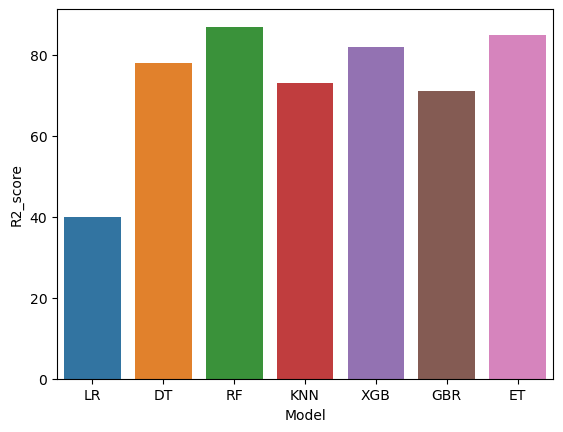

In [123]:
sns.barplot(regressor_result['Model'],regressor_result['R2_score'])